## Implementing classification using k-nearest neighbour algorithm.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [28]:
# read dataset

raw_data = pd.read_csv('datasets/classified_data.csv', index_col=0)
raw_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [29]:
# explore dataset
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [34]:
# standardizing dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
raw_data_scale = raw_data.drop('TARGET CLASS', axis=1)
scaler.fit(raw_data_scale)
scaled_features = scaler.transform(raw_data_scale)

In [35]:
df_scaled_features = pd.DataFrame(scaled_features, columns=raw_data_scale.columns)

In [36]:
df_scaled_features.sample(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
115,0.734132,0.450895,-0.737000,-1.329856,-1.306651,-0.421222,-0.670239,-0.106227,0.222325,0.325973
542,-0.371097,-0.542766,-0.994677,-0.640001,-0.203254,-1.187624,-0.824470,-2.064350,-0.168938,-0.454282
30,1.459227,0.022922,-1.248902,1.217233,-0.225774,-0.206675,1.263405,-0.581566,0.694093,1.039779
745,1.084927,-0.567965,-0.446826,1.312050,0.472146,-2.482569,-0.829051,-0.111645,1.150151,-0.901141
546,-0.949773,0.415452,1.060311,-1.964569,0.522444,1.644832,0.314463,0.523701,-0.445577,-1.035327
95,0.140262,-0.708341,0.920820,0.426232,-0.722959,-1.088299,-0.153452,-0.238647,2.477734,-1.211352
74,1.078004,0.714469,-0.238553,-0.022653,0.717919,-1.512205,-1.761978,-0.056592,0.976897,-1.394416
374,1.183732,0.415738,-0.323440,-0.104144,0.296475,-0.797141,-1.385640,-1.009630,1.420135,-0.469529
587,-0.539384,0.508360,0.519651,-1.539105,1.250789,1.848772,-0.043866,0.857721,-0.209402,-0.728662
207,-1.231630,0.822311,0.852935,0.616812,-0.356363,-0.996390,2.434575,0.099380,-1.691752,-0.048159


In [38]:

# split data into training and test
from sklearn.model_selection import train_test_split
x = df_scaled_features
y = raw_data['TARGET CLASS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
# train model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [44]:
# make predictions
predictions = model.predict(x_test)

In [46]:
# measure prediction accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        89
           1       0.93      0.86      0.90       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [48]:
print(confusion_matrix(y_test, predictions))

[[82  7]
 [15 96]]


In [52]:
# choosing optimal k value using the Elbow method
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_train, y_train)

    new_predictions = new_model.predict(x_test)

    error_rates.append(np.mean(new_predictions != y_test))

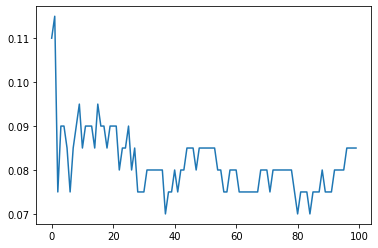

In [53]:
# visualize error rates
plt.plot(error_rates)